In [185]:
%matplotlib inline
pd.options.display.max_rows = 4000

In [225]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from matplotlib import rcParams
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import matplotlib.gridspec as gridspec

# We'll only use a vertical pitch for this tutorial
from mplsoccer import VerticalPitch

from PIL import Image
import urllib
import json
import os
import matplotlib.ticker as ticker
import requests
from io import BytesIO


In [187]:
font_path = "C:/Users/gabri/AppData/Local/Programs/Python/Python39/Lib/site-packages/matplotlib/mpl-data/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("visionreport")

df['sub_type_name'].unique

<bound method Series.unique of 0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
5             Kick Off
6                  NaN
7                  NaN
8                  NaN
9                  NaN
10                 NaN
11                 NaN
12                 NaN
13                 NaN
14                 NaN
15                 NaN
16                 NaN
17                 NaN
18                 NaN
19                 NaN
20                 NaN
21                 NaN
22                 NaN
23                 NaN
24                 NaN
25                 NaN
26                 NaN
27                 NaN
28                 NaN
29                 NaN
30                 NaN
31                 NaN
32                 NaN
33                 NaN
34                 NaN
35                 NaN
36                 NaN
37                 NaN
38                 NaN
39                 NaN
40                 NaN
41                 NaN
42 

In [189]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(3794688)
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')
clearances = df.loc[df['type_name'] == 'Clearance'].set_index('id')
ball_recovery = df.loc[df['type_name'] == 'Ball Recovery'].set_index('id')
pressure = df.loc[df['type_name'] == 'Pressure'].set_index('id')
fouls = df.loc[df['type_name'] == 'Fouls Commited'].set_index('id')
shield = df.loc[df['type_name'] == 'Shield'].set_index('id')

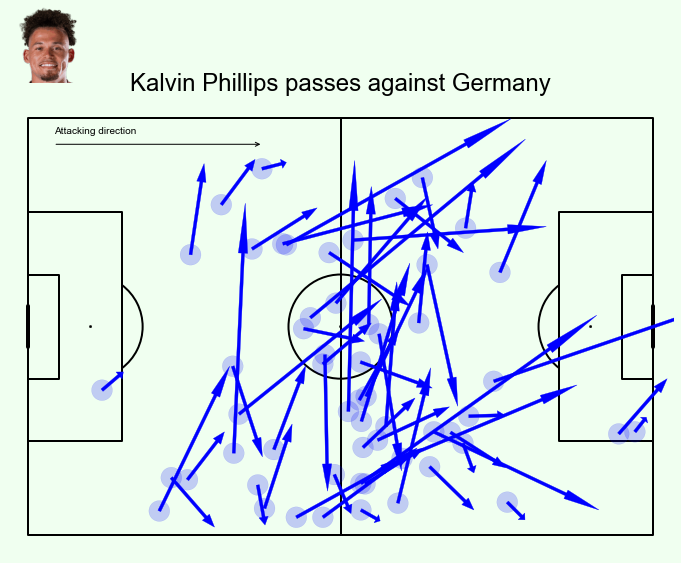

In [233]:
#drawing pitch
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))



for i,thepass in passes.iterrows():
    #if pass made by Lucy Bronze
    if thepass['player_name']=='Kalvin Phillips':
        x=thepass['x']
        y=thepass['y']
        #plot circle
        passCircle=plt.Circle((x,y),2,color="blue")      
        passCircle.set_alpha(.2)   
        ax.add_patch(passCircle)
        dx=abs(thepass['end_x']-x)
        dy=thepass['end_y']-y
        #plot arrow
        passArrow=plt.Arrow(x,y,dx,dy,width=3,color="blue")
        ax.add_patch(passArrow)
        
        
ax2 = fig.add_axes([0.02,0.96,0.15,0.15])
ax2.axis('off')
url = 'https://images.fotmob.com/image_resources/playerimages/609755.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)

ax.set_title("Kalvin Phillips passes against Germany", fontsize = 24)   
ax.annotate(
    xy=(5, 3),
    text='Attacking direction',
    rotation=0,
    size=10
)

ax.annotate(
    xy=(5,5),
    xytext=(45,5),
    text='',
    arrowprops=dict(arrowstyle='<-',linewidth=1)
)
fig.set_size_inches(10, 7)


plt.savefig(
    "figures/Kalvin_Passes.png",
    dpi = 600,
    facecolor = "#e8f5e9",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)


In [196]:
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen

# get data
parser = Sbopen()
df, related, freeze, tactics = parser.event(3794688)

# filter chelsea pressure and pass events
mask_pressure = (df.player_name == 'Kalvin Phillips') & (df.type_name == 'Pressure')
df_pressure = df.loc[mask_pressure, ['x', 'y']]
mask_pressure = (df.player_name == 'Kalvin Phillips') & (df.type_name == 'Pass')
df_pass = df.loc[mask_pressure, ['x', 'y', 'end_x', 'end_y']]

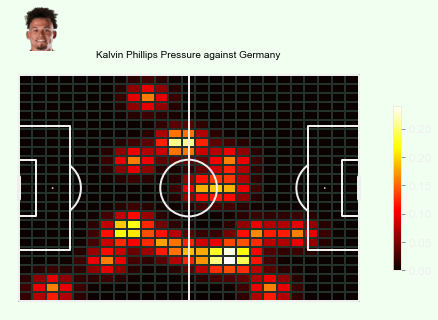

In [231]:
pitch = Pitch(pitch_type='statsbomb', line_zorder=2, line_color='#efefef')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))

ax2 = fig.add_axes([0.02,0.96,0.15,0.15])
ax2.axis('off')
url = 'https://images.fotmob.com/image_resources/playerimages/609755.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)

bin_statistic = pitch.bin_statistic(df_pressure.x, df_pressure.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
#cbar.outline.set_edgecolor('#efefef')
#cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

ax.set_title("Kalvin Phillips Pressure against Germany", fontsize = 10)   

plt.savefig(
    "figures/Kalvin_Pressure.png",
    dpi = 600,
    facecolor = "#e8f5e9",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)

In [215]:
plt.savefig(
    "figures/Kalvin_touches.png",
    dpi = 600,
    facecolor = "#e8f5e9",
    bbox_inches="tight",
    edgecolor="none",
    transparent = False
)

<Figure size 432x288 with 0 Axes>